<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-proditorIF/blob/main/Ago25-26/min2_regul_ag26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabajo en clase 25/08/2023
##Machine Learning/Alma
### Barush Michelle Rueda Muñoz
Se implementa un ajuste a el método de minimos cudrados conocido como regularización\
Se añade un termino que previene el sobre ajuste,es decir penaliza conforme a la complejidad del modelo.\
La funcion costo tiene la siguiente forma $\quad L'L+λW^TW$

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


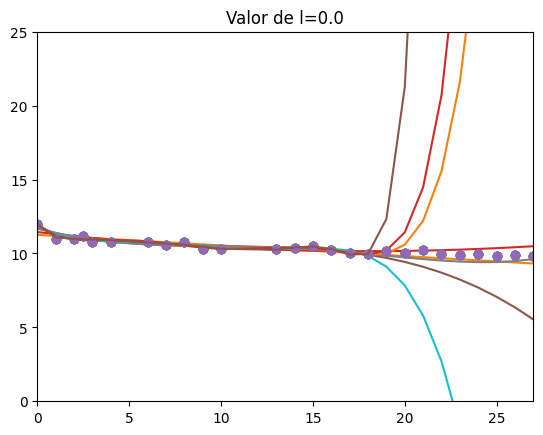

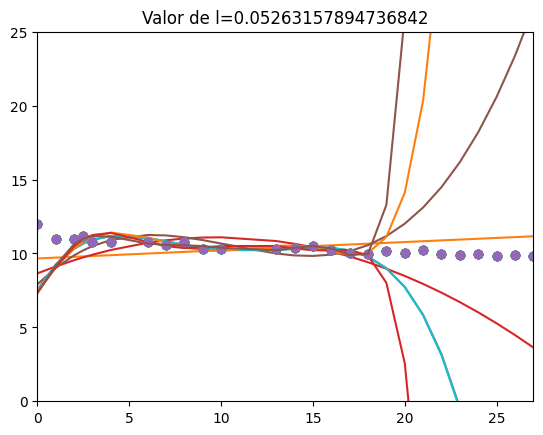

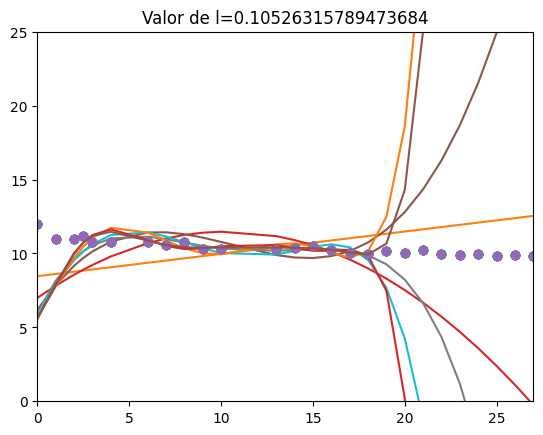

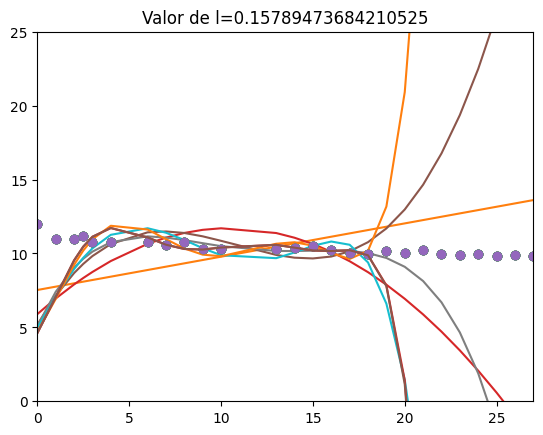

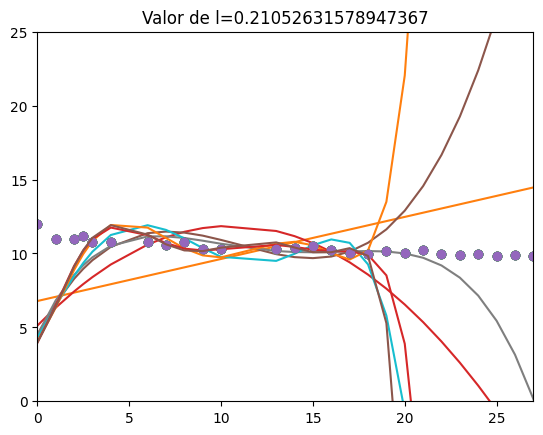

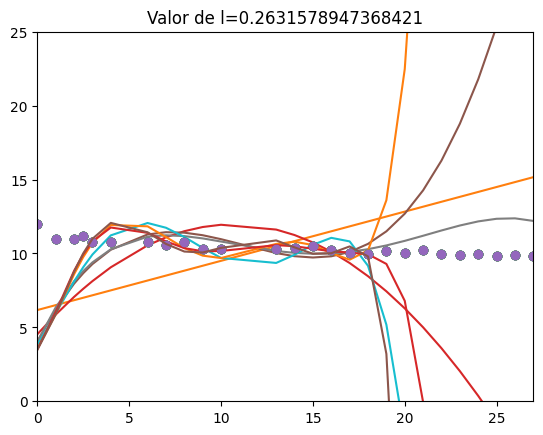

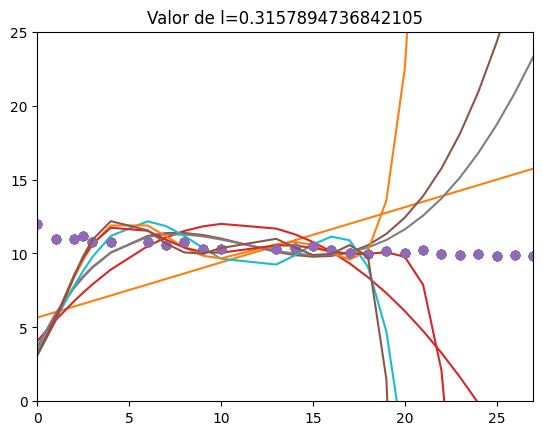

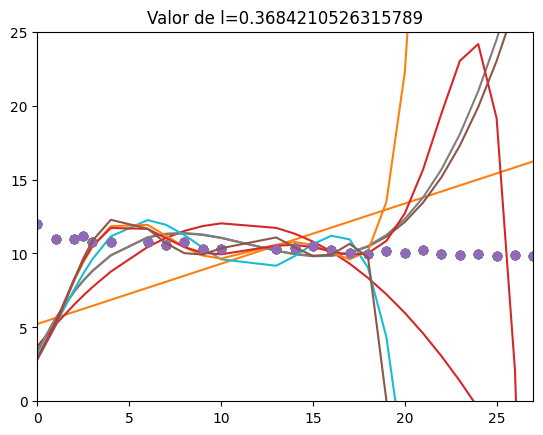

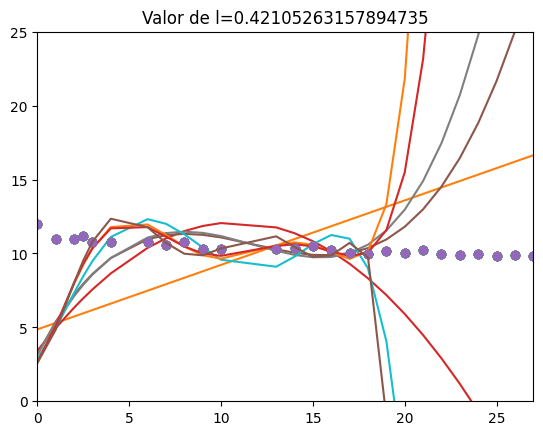

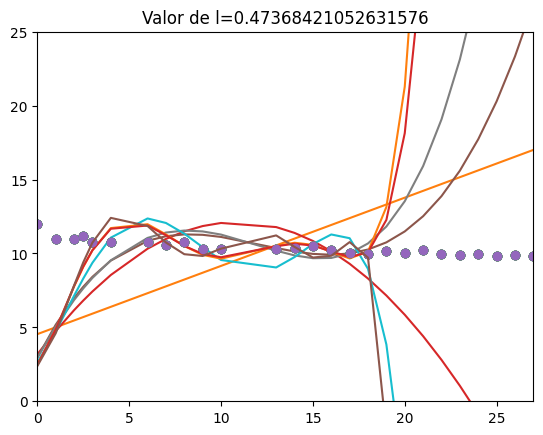

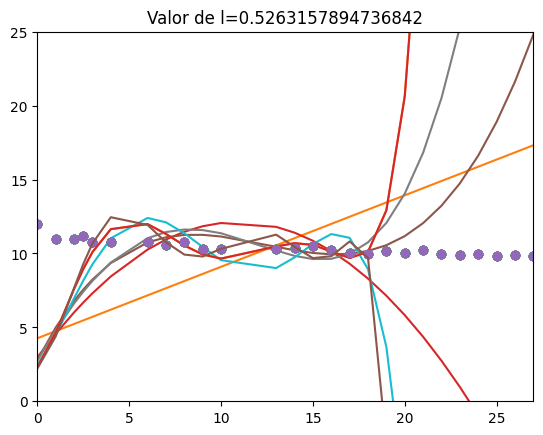

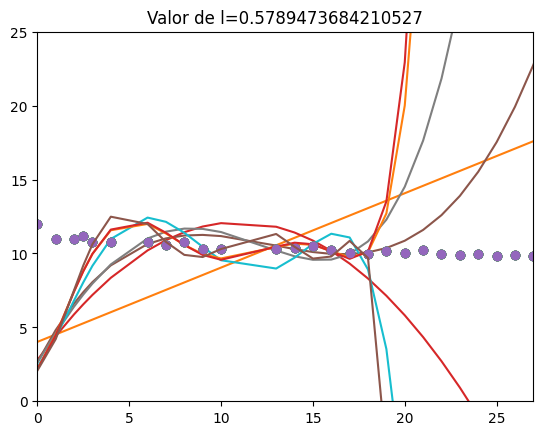

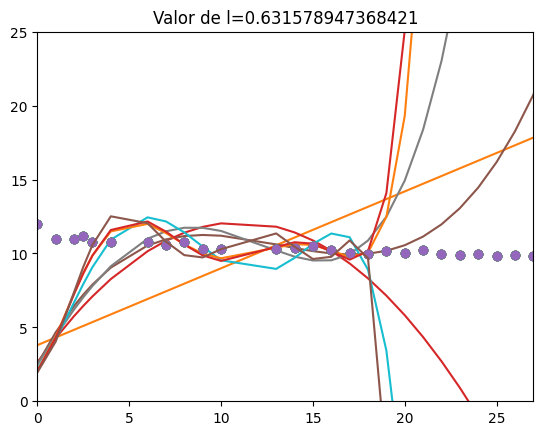

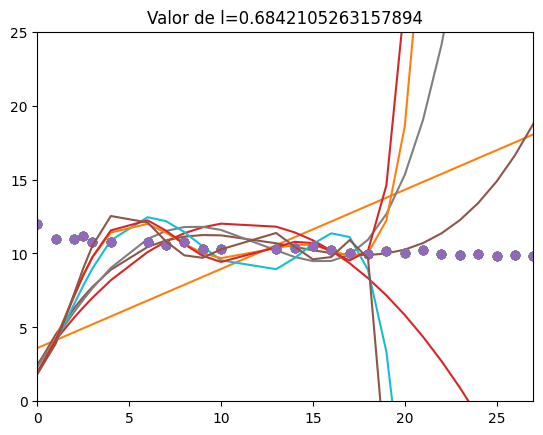

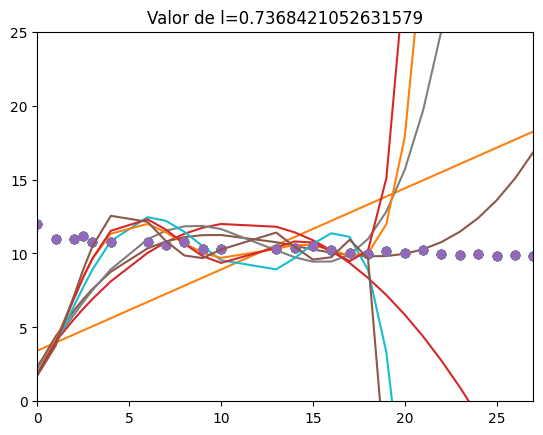

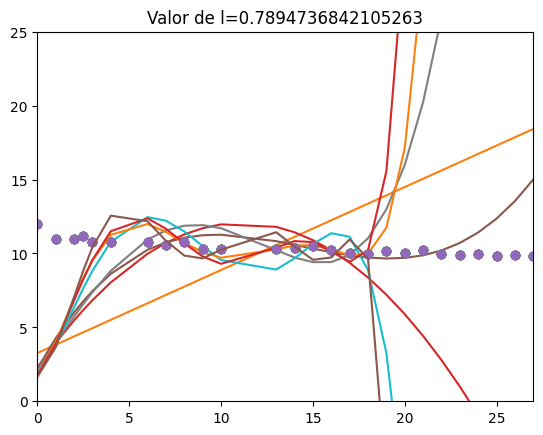

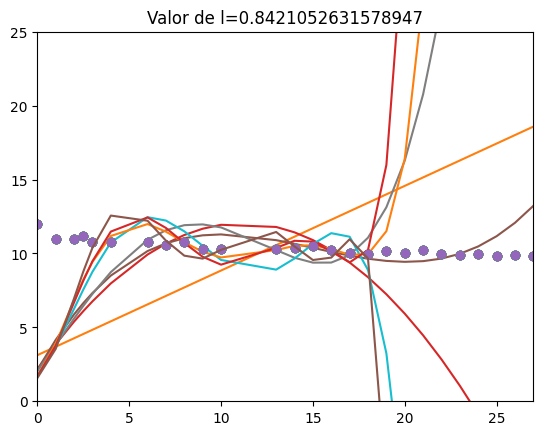

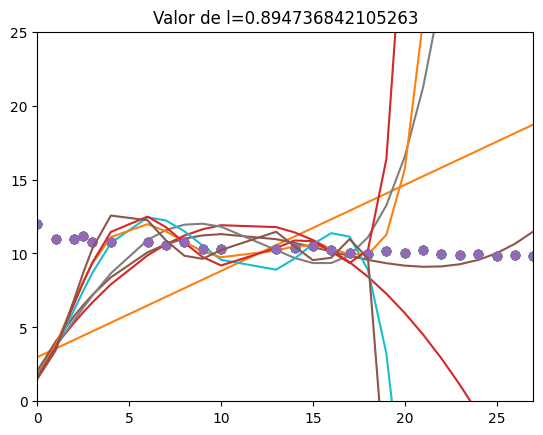

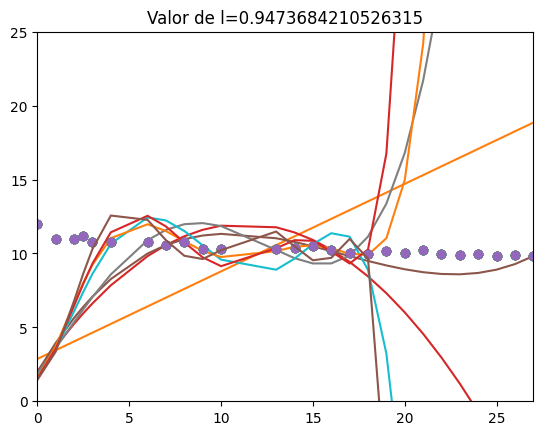

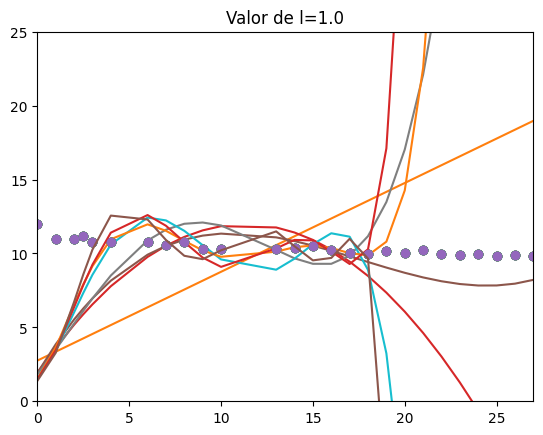

In [66]:
from numpy.linalg import linalg
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Machine_Learn/olympic100m_men.txt"
data=np.loadtxt(file,delimiter=",").T
#Asigamos los datos
x=data[0]
t=data[1]
def Wpoly(x, y, n,l):
     X=np.vstack([np.ones_like(x)]) #matriz
     for i in range(1,n+1):
      Xa=np.vstack([x**i])
      X=np.concatenate([X, Xa])
      Xm=np.matmul(X,X.T) #X^T*X
      A=len(x)*l*np.eye(len(Xm)) # Se añade el termino λW^TW
      invx =np.linalg.inv(A+Xm)
      Xt =np.matmul(X,y) #X^T*t
      W=np.matmul(invx,Xt)#Se calcula W
     return W
# Se normalizan los datos
x = (x - 1896) / 4

Y=0
ll=0.8
n=8 # Se define el grado maximo
#Se grafica hasta orden 8 con difrentes valores de λ
o=np.linspace(0,1,20)
for k in o:
  for i in range(1,n+1):
    W=Wpoly(x[:17], t[:17],i,k) #Se toma un conjunto de entrenamineto de 17 elementos
    Y=0
    for i in range(len(W)):
        Y+= W[i] * x**i
    plt.plot(x, t,'o',label="Datos")
    plt.plot(x, Y, label=f'Orden {i}')
  plt.title(f"Valor de l={k}")
  plt.ylim(0, 25)
  plt.xlim(0, 27)
  plt.show()